# Self- Organizing Feature Map (SOFM)

- Author  :  Mohammad Mahdi Khorsand Aalam
- Contact : [Github Page](https://github.com/OOiiOOiiOO)

![Mohammad Mahdi Khorsand](MyPhoto.jpeg)

## Introduction

A self-organizing map (SOM) or self-organizing feature map (SOFM) is an unsupervised machine learning method that creates a low-dimensional representation of high-dimensional data while maintaining its topological structure. A common example for teaching SOM principles is mapping colors from their RGB components into two dimensions. The network learns to represent these colors as 3D vectors in a 2D space, clustering similar colors into adjacent regions, which is a beneficial feature of Kohonen maps.

![Intro](1.jpg)

## How SOFM Works ?

SOFM operates based on competitive learning. In this learning method, neurons in the network compete to adapt to the input, and only one or a group of neurons "win." The winning neuron, known as the Best Matching Unit (BMU), and its neighboring neurons are updated to align with the input.

![really happens](4.webp)

architecture of the Self Organizing Map with two clusters and n input features of any sample is given below: 

![Intro](5.png)

![Intro](3.png)


## Mathematical Understanding of SOFM

### 1. Problem Definition and Mathematical Parameters

In SOFM, the main objective is to map a high-dimensional input space to a lower-dimensional output space (usually 2D) while preserving the topological structure of the data.

Assume:
- A high-dimensional input vector $\mathbf{x} \in \mathbb{R}^n$, where $n$ is the number of features (dimensions).
- The SOFM network consists of a two-dimensional grid of neurons, where each neuron has a weight vector $\mathbf{w}_{ij} \in \mathbb{R}^n$ associated with it, where $i$ and $j$ represent the coordinates of the neuron on the grid.
- The neurons are arranged on a two-dimensional grid of size $m \times m$. Thus, the number of neurons is $m^2$, and each neuron has a weight vector of length $n$, corresponding to the number of input features.


### 2. Finding the Best Matching Unit (BMU)
To find the Best Matching Unit (BMU), we calculate the Euclidean distance between the input vector $\mathbf{x}$ and the weight vector of each neuron $\mathbf{w}_{ij}$.
The formula for the Euclidean distance is as follows:

$$
d_{ij} = \|\mathbf{x} - \mathbf{w}_{ij}\| = \sqrt{\sum_{k=1}^{n} (x_k - w_{ij,k})^2}
$$

Where:
- $d_{ij}$ is the Euclidean distance between the input vector $\mathbf{x}$ and the weight vector $\mathbf{w}_{ij}$ of the neuron.
- $x_k$ and $w_{ij,k}$ are the $k$-th components of the input vector and the neuron's weight vector, respectively.

The neuron with the smallest distance is selected as the BMU:

$$
BMU = \arg \min_{i,j} d_{ij}
$$

### 3. Updating the Weights
After finding the BMU, the weights of this neuron and its neighboring neurons in the grid are adjusted towards the input vector $\mathbf{x}$. This process is performed such that neurons closer to the BMU undergo larger changes, while neurons further away undergo smaller changes.

The weights are updated using the following formula:

$$
\mathbf{w}_{ij}(t+1) = \mathbf{w}_{ij}(t) + \eta(t) \cdot h_{BMU,ij}(t) \cdot (\mathbf{x}(t) - \mathbf{w}_{ij}(t))
$$

Where:
- $t$ is the time step (or learning iteration).
- $\eta(t)$ is the learning rate, which decreases over time. For example, it can decay exponentially:
  $$
  \eta(t) = \eta_0 \cdot \exp\left(-\frac{t}{\tau}\right)
  $$
  where $\eta_0$ is the initial learning rate and $\tau$ is the time constant.
- $h_{BMU,ij}(t)$ is the neighborhood function that defines the influence of neuron $\mathbf{w}_{ij}$ from the BMU. This function depends on the distance between neuron $(i,j)$ and the BMU and is usually defined as a Gaussian:
  $$
  h_{BMU,ij}(t) = \exp\left(-\frac{\|\mathbf{r}_{BMU} - \mathbf{r}_{ij}\|^2}{2\sigma^2(t)}\right)
  $$
  where $\mathbf{r}_{BMU}$ and $\mathbf{r}_{ij}$ are the positions of the BMU and the $(i,j)$ neuron on the grid, respectively.
- $\sigma(t)$ is the neighborhood radius, which also decreases over time. It typically decays exponentially:
  $$
  \sigma(t) = \sigma_0 \cdot \exp\left(-\frac{t}{\tau_\sigma}\right)
  $$
  where $\sigma_0$ is the initial neighborhood radius and $\tau_\sigma$ is the time constant for the neighborhood size.

### 4. Learning Rate and Neighborhood Function
There are two key factors in SOFM that change over time:

- The **learning rate** $\eta(t)$: Initially, it is large to allow the network to respond quickly to the input, but it decreases over time to ensure more fine-tuned learning.
- The **neighborhood radius** $\sigma(t)$: Initially large, it allows more neurons to be influenced by the BMU, enabling a more global learning phase. As time progresses, this radius decreases, so only neurons close to the BMU are updated, leading to finer, localized learning.

The decay of both the learning rate and the neighborhood radius ensures that the network converges to a stable mapping of the input data.

### 5. Topology and Mapping
SOFM is designed to preserve the topological structure of the input data. This means that if two input vectors $\mathbf{x}_1$ and $\mathbf{x}_2$ are close to each other in the high-dimensional space, their corresponding BMUs should also be close to each other in the two-dimensional grid.

This topological preservation occurs because of the neighborhood function and the weight update rule that allows neighboring neurons to be updated along with the BMU. As a result, SOFM naturally clusters the data and maintains the topological structure of the input space.


## General Algorithm for SOFM
The general SOFM algorithm includes the following steps:

1. **Initialization**:
   - The weights of the neurons are initialized randomly.
   - The initial learning rate $\eta(0)$ and neighborhood radius $\sigma(0)$ are set.
   
2. **Repeat for each input sample**:
   - An input vector $\mathbf{x}$ is chosen.
   - The distance between the input vector and the weight vector of each neuron $\mathbf{w}_{ij}$ is calculated.
   - The Best Matching Unit (BMU) is identified.
   - The weights of the BMU and its neighbors are updated using the formulas above.
   - The learning rate $\eta(t)$ and neighborhood radius $\sigma(t)$ are decayed.
   
3. **End**:
   - The learning process is stopped after a certain number of iterations or when convergence is achieved.


## Applications of SOFM

**Clustering:**
SOFM can automatically cluster data. Similar data points are mapped to neurons close to each other on the map.

**Data Visualization:**
Due to SOFM's ability to map high-dimensional data into a 2D space, it is an effective tool for visualizing data and hidden patterns within it.

**Image Processing:**
SOFM is used in image processing and pattern recognition, as it can map image features to a simpler topological map.

**Medical Data Analysis:**
In analyzing medical signals like EEG and ECG, SOFM helps identify significant patterns.

**Market Analysis:**
In financial markets, SOFM can be used for clustering and analyzing behavioral patterns in financial data.


## Advantages
**Unsupervised Learning:** SOFM does not require labeled data and can automatically identify patterns.
**Topology Preservation:** SOFM maps data to a 2D space while maintaining similarities and differences.
**Dimensionality Reduction:** SOFM is one of the best methods for visualizing complex data in a 2D space.
**Automatic Clustering:** Data is automatically clustered into different groups.

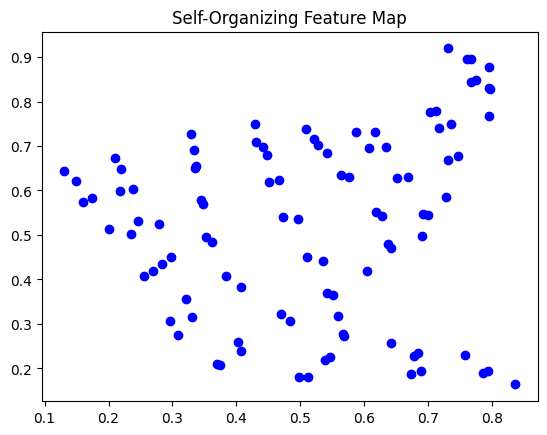

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class SOFM:
    def __init__(self, input_dim, map_size, learning_rate=0.5, sigma=None, max_iterations=1000):
        """
        input_dim: تعداد ویژگی‌های ورودی
        map_size: اندازه شبکه (مثلاً 10x10)
        learning_rate: نرخ یادگیری اولیه
        sigma: شعاع همسایگی اولیه (اگر None باشد، برابر با map_size/2 تنظیم می‌شود)
        max_iterations: حداکثر تعداد تکرارهای الگوریتم
        """
        self.input_dim = input_dim
        self.map_size = map_size
        self.learning_rate = learning_rate
        self.sigma = sigma if sigma else map_size / 2
        self.max_iterations = max_iterations
        self.weights = np.random.random((map_size, map_size, input_dim))
        
    def find_bmu(self, x):
        """ پیدا کردن بهترین نورون (BMU) برای یک ورودی """
        distances = np.linalg.norm(self.weights - x, axis=-1)
        return np.unravel_index(np.argmin(distances), distances.shape)

    def neighborhood_function(self, bmu, iteration):
        """ محاسبه تابع همسایگی برای BMU و نورون‌های همسایه """
        sigma = self.sigma * np.exp(-iteration / (self.max_iterations / np.log(self.sigma)))
        distances = np.linalg.norm(np.indices((self.map_size, self.map_size)).T - np.array(bmu), axis=-1)
        return np.exp(-(distances ** 2) / (2 * (sigma ** 2)))

    def train(self, data):
        """ آموزش شبکه بر روی داده‌های ورودی """
        for iteration in range(self.max_iterations):
            # انتخاب یک ورودی تصادفی از داده‌ها
            x = data[np.random.randint(0, len(data))]

            # پیدا کردن BMU
            bmu = self.find_bmu(x)

            # به‌روزرسانی وزن‌های BMU و نورون‌های همسایه
            learning_rate_t = self.learning_rate * np.exp(-iteration / self.max_iterations)
            neighborhood = self.neighborhood_function(bmu, iteration)
            for i in range(self.map_size):
                for j in range(self.map_size):
                    self.weights[i, j] += learning_rate_t * neighborhood[i, j] * (x - self.weights[i, j])
    
    def visualize_map(self):
        """ نمایش نقشه وزن‌ها """
        fig, ax = plt.subplots()
        for i in range(self.map_size):
            for j in range(self.map_size):
                ax.scatter(self.weights[i, j, 0], self.weights[i, j, 1], marker='o', color='blue')
        plt.title("Self-Organizing Feature Map")
        plt.show()

# نمونه‌گیری داده‌ها (مثلاً نقاط دو بعدی)
data = np.random.rand(100, 2)

# ایجاد و آموزش SOFM
sofm = SOFM(input_dim=2, map_size=10, learning_rate=0.5, max_iterations=500)
sofm.train(data)

# نمایش نقشه وزن‌ها
sofm.visualize_map()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from scipy.signal import find_peaks

class SOFM:
    def __init__(self, input_dim, map_size, learning_rate=0.5, sigma=None, max_iterations=1000):
        self.input_dim = input_dim
        self.map_size = map_size
        self.learning_rate = learning_rate
        self.sigma = sigma if sigma else map_size / 2
        self.max_iterations = max_iterations
        self.weights = np.random.random((map_size, map_size, input_dim))
        
    def find_bmu(self, x):
        """ پیدا کردن بهترین نورون (BMU) برای یک ورودی """
        distances = np.linalg.norm(self.weights - x, axis=-1)
        return np.unravel_index(np.argmin(distances), distances.shape)

    def neighborhood_function(self, bmu, iteration):
        """ محاسبه تابع همسایگی برای BMU و نورون‌های همسایه """
        sigma = self.sigma * np.exp(-iteration / (self.max_iterations / np.log(self.sigma)))
        distances = np.linalg.norm(np.indices((self.map_size, self.map_size)).T - np.array(bmu), axis=-1)
        return np.exp(-(distances ** 2) / (2 * (sigma ** 2)))

    def train(self, data):
        """ آموزش شبکه بر روی داده‌های ورودی """
        for iteration in range(self.max_iterations):
            x = data[np.random.randint(0, len(data))]
            bmu = self.find_bmu(x)
            learning_rate_t = self.learning_rate * np.exp(-iteration / self.max_iterations)
            neighborhood = self.neighborhood_function(bmu, iteration)
            for i in range(self.map_size):
                for j in range(self.map_size):
                    self.weights[i, j] += learning_rate_t * neighborhood[i, j] * (x - self.weights[i, j])
    
    def visualize_map(self):
        """ نمایش نقشه وزن‌ها """
        fig, ax = plt.subplots()
        for i in range(self.map_size):
            for j in range(self.map_size):
                ax.scatter(self.weights[i, j, 0], self.weights[i, j, 1], marker='o', color='blue')
        plt.title("Self-Organizing Feature Map")
        plt.show()

# بارگذاری داده‌های MIT-BIH Arrhythmia
def load_ecg_data(file_path):
    """ بارگذاری داده‌های ECG از دیتاست MIT-BIH """
    mat = loadmat(file_path)
    ecg_signal = mat['val'][0]  # داده ECG در فایل MAT
    return ecg_signal

def extract_features(ecg_signal, sampling_rate=360):
    """ استخراج ویژگی‌ها از سیگنال ECG مانند نقاط R و فواصل مهم """
    peaks, _ = find_peaks(ecg_signal, distance=sampling_rate/2.5)
    rr_intervals = np.diff(peaks) / sampling_rate  # فواصل RR
    return rr_intervals

# مسیر فایل داده‌های ECG (فایل‌های MAT)
file_path = 'path_to_your_data/100.mat'

# بارگذاری و پردازش داده‌ها
ecg_signal = load_ecg_data(file_path)
features = extract_features(ecg_signal)

# استانداردسازی داده‌ها
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.reshape(-1, 1))

# ایجاد و آموزش SOFM
sofm = SOFM(input_dim=1, map_size=10, learning_rate=0.5, max_iterations=500)
sofm.train(scaled_features)

# نمایش نقشه وزن‌ها
sofm.visualize_map()


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_data/100.mat'

In [12]:
!pip install wfdb

import numpy as np
import wfdb
import matplotlib.pyplot as plt
from wfdb import rdrecord
from sklearn.preprocessing import StandardScaler
from scipy.signal import find_peaks

class SOFM:
    def __init__(self, input_dim, map_size, learning_rate=0.1, sigma=None, max_iterations=1000):
        self.input_dim = input_dim
        self.map_size = map_size
        self.learning_rate = learning_rate
        self.sigma = sigma if sigma else map_size / 2
        self.max_iterations = max_iterations
        self.weights = np.random.rand(map_size, map_size, input_dim)

    def find_bmu(self, x):
        distances = np.linalg.norm(self.weights - x, axis=-1)
        return np.unravel_index(np.argmin(distances), distances.shape)

    def neighborhood_function(self, bmu, iteration):
        sigma = self.sigma * np.exp(-iteration / (self.max_iterations / np.log(self.sigma)))
        distances = np.linalg.norm(np.indices((self.map_size, self.map_size)).T - np.array(bmu), axis=-1)
        return np.exp(-(distances ** 2) / (2 * (sigma ** 2)))

    def train(self, data):
        for iteration in range(self.max_iterations):
            x = data[np.random.randint(0, len(data))]
            bmu = self.find_bmu(x)
            learning_rate_t = self.learning_rate * np.exp(-iteration / self.max_iterations)
            neighborhood = self.neighborhood_function(bmu, iteration)
            self.weights += learning_rate_t * neighborhood[..., np.newaxis] * (x - self.weights)

    def visualize_map(self):
        fig, ax = plt.subplots()
        for i in range(self.map_size):
            for j in range(self.map_size):
                ax.scatter(self.weights[i, j, 0], self.weights[i, j, 1], marker='o', color='blue')
        plt.title("Self-Organizing Feature Map")
        plt.show()

def load_ecg_data(file_path):
    record = wfdb.rdrecord(file_path[:-4])
    ecg_signal = record.p_signals[:, 0]
    return ecg_signal

def extract_features(ecg_signal, sampling_rate):
    peaks, _ = find_peaks(ecg_signal, distance=sampling_rate/2.5)
    rr_intervals = np.diff(peaks) / sampling_rate
    return np.vstack([rr_intervals]).T

# مسیر فایل‌های ECG
file_paths = ['100.hea', '101.hea']

# بارگذاری و پردازش داده‌ها
all_data = []
for file_path in file_paths:
    ecg_signal = load_ecg_data(file_path)
    features = extract_features(ecg_signal, record.fs)
    all_data.append(features)

all_data = np.vstack(all_data)

# استانداردسازی داده‌ها
scaler = StandardScaler()
scaled_features = scaler.fit_transform(all_data)

# ایجاد و آموزش SOFM
sofm = SOFM(input_dim=scaled_features.shape[1], map_size=10, learning_rate=0.1, max_iterations=1000)
sofm.train(scaled_features)

# نمایش نقشه وزن‌ها
sofm.visualize_map()

AttributeError: 'Record' object has no attribute 'p_signals'

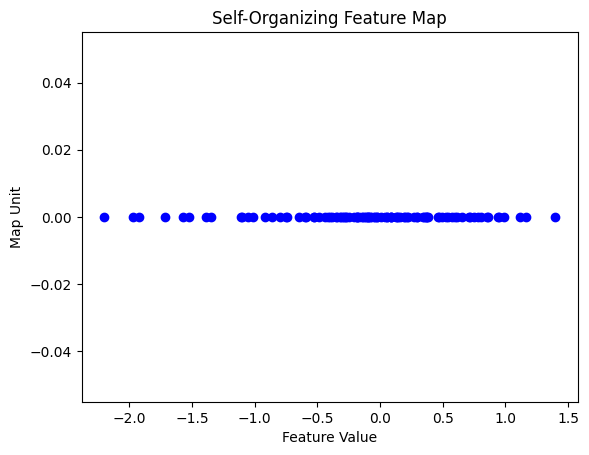

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing
from sklearn.preprocessing import StandardScaler

class SOFM:
    def __init__(self, input_dim, map_size, learning_rate=0.5, sigma=None, max_iterations=1000):
        self.input_dim = input_dim
        self.map_size = map_size
        self.learning_rate = learning_rate
        self.sigma = sigma if sigma else map_size / 2
        self.max_iterations = max_iterations
        self.weights = np.random.random((map_size, map_size, input_dim))
        
    def find_bmu(self, x):
        """ پیدا کردن بهترین نورون (BMU) برای یک ورودی """
        distances = np.linalg.norm(self.weights - x, axis=-1)
        return np.unravel_index(np.argmin(distances), distances.shape)

    def neighborhood_function(self, bmu, iteration):
        """ محاسبه تابع همسایگی برای BMU و نورون‌های همسایه """
        sigma = self.sigma * np.exp(-iteration / (self.max_iterations / np.log(self.sigma)))
        distances = np.linalg.norm(np.indices((self.map_size, self.map_size)).T - np.array(bmu), axis=-1)
        return np.exp(-(distances ** 2) / (2 * (sigma ** 2)))

    def train(self, data):
        """ آموزش شبکه بر روی داده‌های ورودی """
        for iteration in range(self.max_iterations):
            x = data[np.random.randint(0, len(data))]
            bmu = self.find_bmu(x)
            learning_rate_t = self.learning_rate * np.exp(-iteration / self.max_iterations)
            neighborhood = self.neighborhood_function(bmu, iteration)
            for i in range(self.map_size):
                for j in range(self.map_size):
                    self.weights[i, j] += learning_rate_t * neighborhood[i, j] * (x - self.weights[i, j])
    
    def visualize_map(self):
        """ نمایش نقشه وزن‌ها """
        fig, ax = plt.subplots()
        for i in range(self.map_size):
            for j in range(self.map_size):
                ax.scatter(self.weights[i, j, 0], 0, marker='o', color='blue')  # نمایش تک‌بعدی
        plt.title("Self-Organizing Feature Map")
        plt.xlabel("Feature Value")
        plt.ylabel("Map Unit")
        plt.show()

# بارگذاری داده‌های MIT-BIH Arrhythmia از فایل‌های .dat و .hea
def load_ecg_data(record_name, sampling_rate=360):
    """
    بارگذاری داده‌های ECG با استفاده از کتابخانه WFDB
    record_name: نام فایل داده بدون پسوند (مثلاً '100' برای '100.dat' و '100.hea')
    """
    # بارگذاری داده و اطلاعات رکورد
    record = wfdb.rdrecord(record_name)
    annotation = wfdb.rdann(record_name, 'atr')
    
    # دریافت سیگنال ECG
    ecg_signal = record.p_signal[:, 0]  # فرض می‌کنیم سیگنال اول برای ECG است
    
    # فیلتر کردن سیگنال (در صورت نیاز)
    ecg_signal = wfdb.processing.normalize_bound(ecg_signal, lb=-1, ub=1)  # نرمال‌سازی سیگنال به بازه [-1, 1]
    
    # پیدا کردن نقاط R
    qrs_inds = processing.gqrs_detect(ecg_signal, fs=sampling_rate)
    
    # محاسبه فواصل RR
    rr_intervals = np.diff(qrs_inds) / sampling_rate  # فواصل RR
    return rr_intervals

# مسیر فایل داده‌های ECG (بدون پسوند)
record_name = '100'

# بارگذاری و پردازش داده‌ها
rr_intervals = load_ecg_data(record_name)

# استانداردسازی داده‌ها
scaler = StandardScaler()
scaled_rr_intervals = scaler.fit_transform(rr_intervals.reshape(-1, 1))

# ایجاد و آموزش SOFM
sofm = SOFM(input_dim=1, map_size=10, learning_rate=0.5, max_iterations=500)
sofm.train(scaled_rr_intervals)

# نمایش نقشه وزن‌ها
sofm.visualize_map()


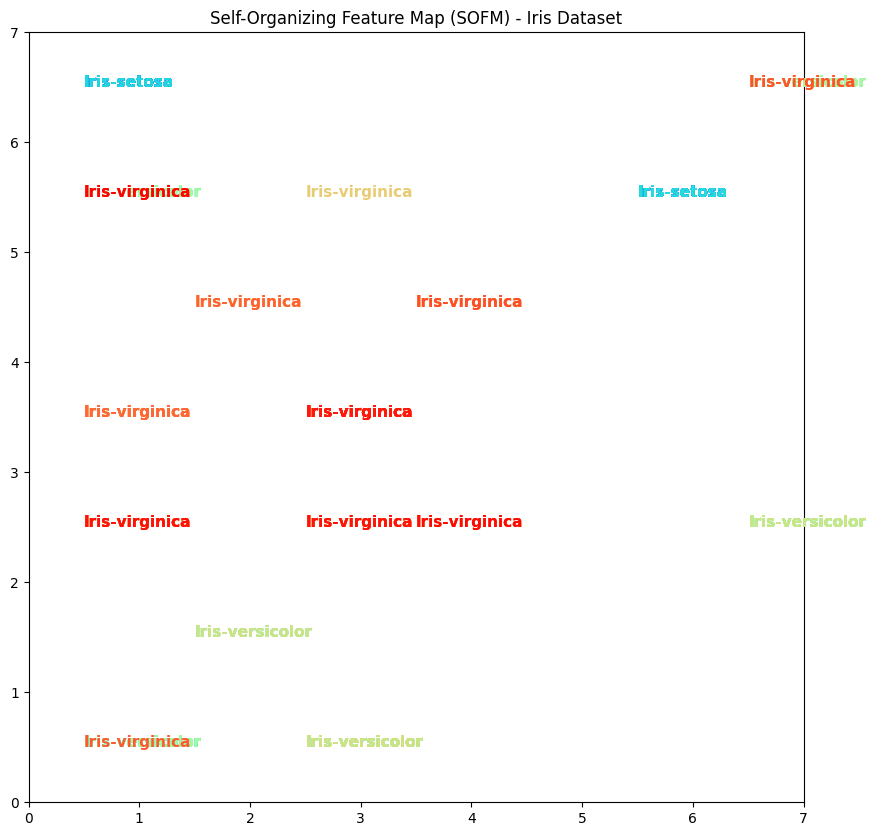

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, header=None)


X = data.iloc[:, 0:4].values  
y = data.iloc[:, 4].values  

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

m = 7  
n = 7  
sigma = 1.0  
learning_rate = 0.5  
epochs = 100

weights = np.random.rand(m, n, X_scaled.shape[1])

def find_bmu(x):
    """یافتن بهترین نورون برنده (BMU)"""
    distances = np.linalg.norm(weights - x, axis=2)
    bmu_idx = np.unravel_index(np.argmin(distances), distances.shape)
    return bmu_idx

def neighborhood_function(bmu, t):
    """تابع همسایگی"""
    sigma_t = sigma * np.exp(-t / epochs)
    bmu_row, bmu_col = bmu
    neighborhood = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            distance = np.sqrt((i - bmu_row)**2 + (j - bmu_col)**2)
            neighborhood[i, j] = np.exp(-distance**2 / (2*sigma_t**2))
    return neighborhood

for t in range(epochs):
    for x in X_scaled:
        bmu = find_bmu(x)
        neighborhood = neighborhood_function(bmu, t)
        weights += learning_rate * neighborhood[..., np.newaxis] * (x - weights[bmu])


plt.figure(figsize=(10, 10))
for i, x in enumerate(X_scaled):
    w = find_bmu(x) 
    plt.text(w[0] + .5, w[1] + .5, str(y[i]), color=plt.cm.rainbow(i / len(X_scaled)), fontdict={'weight': 'bold', 'size': 11})
plt.xlim([0, weights.shape[0]])
plt.ylim([0, weights.shape[1]])
plt.title('Self-Organizing Feature Map (SOFM) - Iris Dataset')
plt.show()

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import gzip
import struct

# Load the Fashion MNIST dataset
def load_mnist(data_url):
    try:
        response = requests.get(data_url)
        content = BytesIO(response.content)
        with gzip.open(content, 'rb') as f:
            _, _, rows, cols = struct.unpack('>IIII', f.read(16))
            data = np.frombuffer(f.read(), dtype=np.uint8).reshape(-1, rows * cols)
        return data
    except (gzip.BadGzipFile, ValueError) as e:
        print(f"Error loading data: {e}")
        return None
    
# Download data
data_url = "https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion-mnist-test-labels-idx1-ubyte.gz"
X = load_mnist(data_url)
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# SOM parameters
m = 10  # Map size (rows)
n = 10  # Map size (columns)
sigma = 1.0  # Initial neighborhood radius
learning_rate = 0.5  # Initial learning rate
epochs = 100

# Initialize weights
weights = np.random.rand(m, n, X_scaled.shape[1])

def find_bmu(x):
    """یافتن بهترین نورون برنده (BMU)"""
    distances = np.linalg.norm(weights - x, axis=2)
    bmu_idx = np.unravel_index(np.argmin(distances), distances.shape)
    return bmu_idx

def neighborhood_function(bmu, t):
    """تابع همسایگی"""
    sigma_t = sigma * np.exp(-t / epochs)
    bmu_row, bmu_col = bmu
    neighborhood = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            distance = np.sqrt((i - bmu_row)**2 + (j - bmu_col)**2)
            neighborhood[i, j] = np.exp(-distance**2 / (2*sigma_t**2))
    return neighborhood

# Training loop
for t in range(epochs):
    for x in X_scaled:
        bmu = find_bmu(x)
        neighborhood = neighborhood_function(bmu, t)
        weights += learning_rate * neighborhood[..., np.newaxis] * (x - weights[bmu])

# Assign data points to clusters
clusters = np.zeros(X_scaled.shape[0])
for i, x in enumerate(X_scaled):
    bmu = find_bmu(x)
    clusters[i] = bmu[0] * m + bmu[1]

# Visualize the results
plt.figure(figsize=(10, 10))
for i in range(m*n):
    plt.subplot(m, n, i+1)
    plt.imshow(weights[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

Error loading data: Not a gzipped file (b'\n\n')


ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

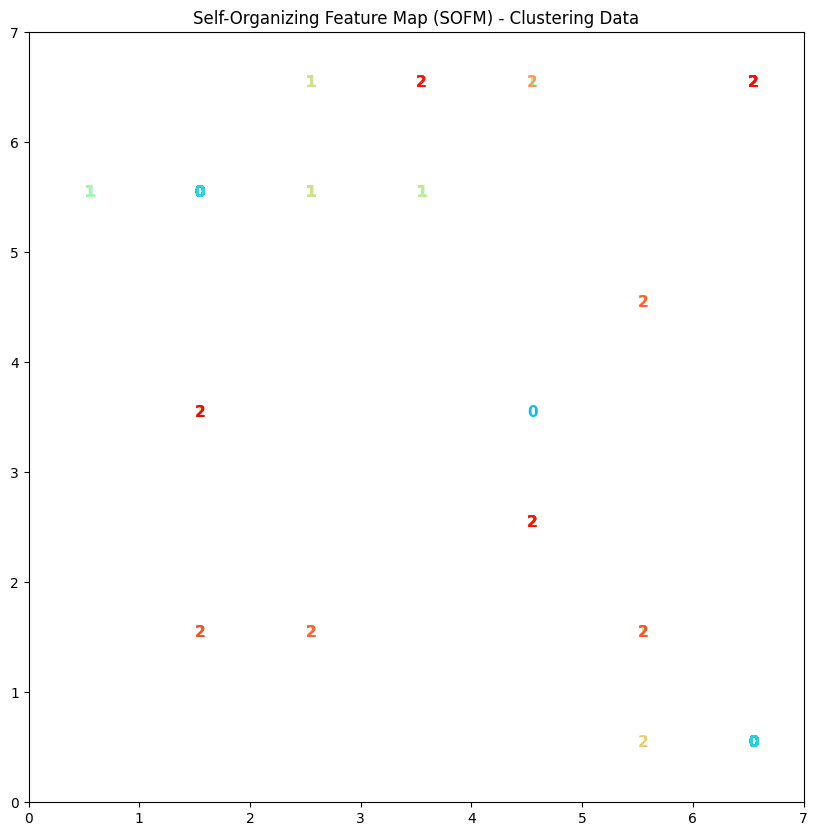

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Load a sample clustering dataset (replace with your own data)
data = load_iris()
X = data.data
y = data.target  # Cluster labels (optional for visualization)

# Feature scaling (optional but recommended)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# SOFM parameters
m = 7  # Number of rows in the SOFM map
n = 7  # Number of columns in the SOFM map
sigma = 1.0  # Initial neighborhood size
learning_rate = 0.5  # Learning rate
epochs = 100

# Initialize SOFM weights
weights = np.random.rand(m, n, X_scaled.shape[1])


def find_bmu(x):
  """Finds the Best Matching Unit (BMU) for a data point."""
  distances = np.linalg.norm(weights - x, axis=2)
  bmu_idx = np.unravel_index(np.argmin(distances), distances.shape)
  return bmu_idx


def neighborhood_function(bmu, t):
  """Calculates the neighborhood function based on distance and time."""
  sigma_t = sigma * np.exp(-t / epochs)
  bmu_row, bmu_col = bmu
  neighborhood = np.zeros((m, n))
  for i in range(m):
    for j in range(n):
      distance = np.sqrt((i - bmu_row)**2 + (j - bmu_col)**2)
      neighborhood[i, j] = np.exp(-distance**2 / (2*sigma_t**2))
  return neighborhood


# Train the SOFM
for t in range(epochs):
  for x in X_scaled:
    bmu = find_bmu(x)
    neighborhood = neighborhood_function(bmu, t)
    weights += learning_rate * neighborhood[..., np.newaxis] * (x - weights[bmu])


# Visualize the results
plt.figure(figsize=(10, 10))

# Optional: Plot cluster labels from the loaded data (if available)
if hasattr(data, 'target'):
  for i, x in enumerate(X_scaled):
    w = find_bmu(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(y[i]), color=plt.cm.rainbow(i / len(X_scaled)), fontdict={'weight': 'bold', 'size': 11})
else:
  # Perform KMeans clustering to assign labels for visualization
  kmeans = KMeans(n_clusters=3, random_state=0)  # Adjust n_clusters as needed
  kmeans.fit(X_scaled)
  cluster_labels = kmeans.labels_
  for i, x in enumerate(X_scaled):
    w = find_bmu(x)
    plt.text(w[0] + 0.5, w[1] + 0.5, str(cluster_labels[i]), color=plt.cm.rainbow(i / len(X_scaled)), fontdict={'weight': 'bold', 'size': 11})

plt.xlim([0, weights.shape[0]])
plt.ylim([0, weights.shape[1]])
plt.title('Self-Organizing Feature Map (SOFM) - Clustering Data')
plt.show()

## References
**1.** http://www.ai-junkie.com/ann/som/som1.html
**2.** Applications of the growing self-organizing map, Th. Villmann, H.-U. Bauer, May 1998
**3.** [A Comprehensive Introduction to Self-Organizing Maps](https://towardsdatascience.com/?gi=71eda8a06083)
**4.**